In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/titanic_train.csv")
data

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [ ]:
data = data.fillna({'age':data['age'].mean(),'fare':data['fare'].mean()})
data

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,29.519847,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.000000,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.000000,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.000000,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.000000,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.000000,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.000000,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.000000,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


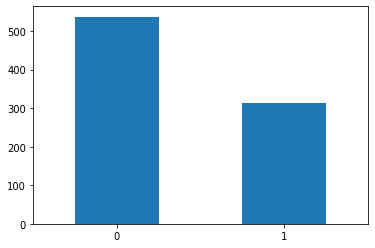

In [ ]:
import matplotlib.pyplot as plt
T  = pd.value_counts(data['survived'],sort=True)
T.plot(kind='bar',rot=0)

In [ ]:
x = data.iloc[:,[0,1,3,4,5,6,7,8]]
x
x.isnull().sum()

passenger_id    0
pclass          0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
dtype: int64

In [ ]:
y = data['survived']
y

0      1
1      0
2      0
3      1
4      0
      ..
845    0
846    0
847    1
848    0
849    0
Name: survived, Length: 850, dtype: int64

In [ ]:
x = pd.get_dummies(x)
x

,passenger_id,pclass,age,sibsp,parch,fare,sex_female,sex_male,ticket_110152,ticket_110465,ticket_110489,ticket_110564,ticket_110813,ticket_111240,ticket_111320,ticket_111361,ticket_111426,ticket_111427,ticket_112051,ticket_112052,ticket_112058,ticket_112059,ticket_112377,ticket_112378,ticket_112379,ticket_112901,ticket_113028,ticket_113043,ticket_113044,ticket_113050,ticket_113051,ticket_113055,ticket_113059,ticket_113503,ticket_113505,ticket_113509,ticket_113514,ticket_113572,ticket_113760,ticket_113767,...,ticket_SC/Paris 2123,ticket_SC/Paris 2163,ticket_SO/C 14885,ticket_SOTON/O.Q. 3101262,ticket_SOTON/O.Q. 3101263,ticket_SOTON/O.Q. 3101306,ticket_SOTON/O.Q. 3101309,ticket_SOTON/O.Q. 3101310,ticket_SOTON/O.Q. 3101311,ticket_SOTON/O.Q. 3101314,ticket_SOTON/O.Q. 3101315,ticket_SOTON/O.Q. 392078,ticket_SOTON/O2 3101284,ticket_SOTON/O2 3101287,ticket_SOTON/OQ 3101316,ticket_SOTON/OQ 392076,ticket_SOTON/OQ 392086,ticket_SOTON/OQ 392090,ticket_STON/O 2. 3101268,ticket_STON/O 2. 3101269,ticket_STON/O 2. 3101273,ticket_STON/O 2. 3101285,ticket_STON/O 2. 3101286,ticket_STON/O 2. 3101288,ticket_STON/O 2. 3101291,ticket_STON/O2. 3101270,ticket_STON/O2. 3101271,ticket_STON/O2. 3101279,ticket_STON/O2. 3101283,ticket_STON/O2. 3101290,ticket_STON/OQ. 369943,ticket_W./C. 14258,ticket_W./C. 14263,ticket_W./C. 14266,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735
0,1216,3,29.519847,0,0,7.7333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,699,3,38.000000,0,0,8.6625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1267,3,30.000000,1,1,24.1500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,449,2,54.000000,1,3,23.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,576,2,40.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,55.000000,0,0,50.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
846,174,1,58.000000,0,0,29.7000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
847,467,2,24.000000,1,0,26.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
848,1112,3,3.000000,1,1,13.7750,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
class_1 = data[data['survived']==1]
class_0 = data[data['survived']==0]
# print(class_0.shape,class_1.shape)
smt= SMOTETomek(random_state=42)
xtr,xty= smt.fit_resample(x,y)
print(xtr.shape,xty.shape)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(966, 668) (966,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(xtr.shape,xty.shape)

(966, 668) (966,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, stratify=y,random_state=20,test_size = 20)
y_test.value_counts(normalize=True)

0    0.65
1    0.35
Name: survived, dtype: float64

In [ ]:
from imblearn.combine import SMOTETomek
smt= SMOTETomek(random_state=42)
x_res=smt.fit_resample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.combine import SMOTETomek
smt= SMOTETomek(random_state=42)
x_res1=smt.fit_resample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

T2 = pd.value_counts(x_res1)
from collections import Counter
print('resambled{}'.format(Counter(T2)))


resambledCounter({1: 2})


In [ ]:
x.shape

(850, 668)

In [ ]:
y.shape

(850,)

In [ ]:
y_train.value_counts(normalize=True)

0    0.631325
1    0.368675
Name: survived, dtype: float64

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(x_train)
# sc.transform(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc1 = RandomForestClassifier()
model = rfc1.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
# RFC=RandomForestClassifier()
# n_estimator = [100]
# criterion = ['gini','entropy']
# max_depth = [3,5,10]
# parameters = {n_estimator:10,criterion:['gini','entropy'],max_depth:10}

# gscv = GridSearchCV(rfc1,parameters,cv=10)
# gscv.fit(x_train,y_train)
# RFC.fit(x_train,y_train)



0.8

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest


In [ ]:
forestVC = RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1)
modelVC = forestVC.fit(x_train, y_train) 
y_predVC = modelVC.predict(x_test)
y_predVC

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rfc1, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)



Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 19.4min finished


In [ ]:
bestF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
bestF.best_score_

0.8337562566490521

In [ ]:
gridF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [ ]:
# gscv.best_params_

In [ ]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 800, min_samples_split = 2, min_samples_leaf = 1)               
modelOpt = forestOpt.fit(x_train, y_train)
y_pred1 = modelOpt.predict(x_test)
y_pred1
accuracy_score(y_test,y_pred1)


0.8